# Testing Perceptron using Iris Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Testing whether the correct dataset is being selected. 
df = pd.read_csv('iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


We are now going to get the class labels of the setosa and versicolor flowers and convert them into two integer class labels 1 (versicolor) and -1 (setosa). Of the first 100 class labels, 50 are versicolor and 50 are setosa. These will then be assigned to our target vector (y).

In [3]:
# .iloc selections - position based selection 
# data.iloc[<row selection>, <column selection>]
y = df.iloc[0:100, 4].values
y = np.where(y == 'setosa', -1, 1)

We are now going to extract the sepal length and petal length of those same 100 training data records and assign them to the training matrix (x). We will then display them on a scatter graph.

In [4]:
# extract sepal length and petal length columns
x = df.iloc[0:100, [0, 2]].values

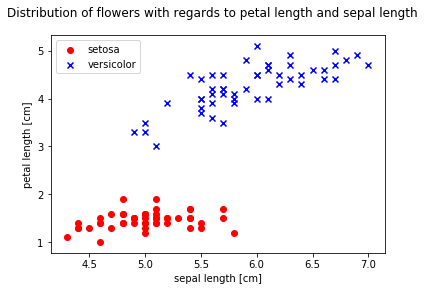

In [5]:
# plot data 
fig = plt.figure()
fig.suptitle("""Distribution of flowers with regards to petal length and sepal length\n""")
plt.scatter(x[:50, 0], x[:50, 1], color='red',
            marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1],
           color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

We can clearly see that the setosa and the versicolor flowers can be differentiated with a linear decision boundary purely based upon their petal and sepal lengths. This makes hem ideal for a perceptron to classify between, as this is a linear classifier.

# Training the Perceptron on Iris Data

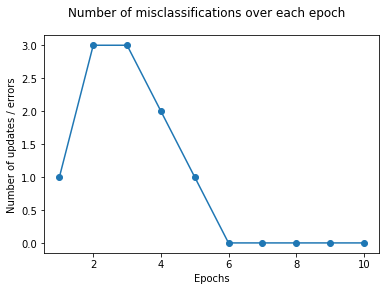

In [6]:
from Perceptron import Perceptron
ppn = Perceptron(rate=0.1, iterations=10, random_gen_seed=1)

ppn.fit(x, y)
fig = plt.figure()
fig.suptitle("Number of misclassifications over each epoch")
plt.plot(range(1, len(ppn.errors) + 1), ppn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates / errors')
plt.show()

We can see that the perceptron has been trained on the dataset given to it. Initially there were more misclassifications (incorrect net_inputs), but as we changed the weight vector based on each incorrect prediction, there were fewer errors.

We can now plot another graph to visualise the linear decision boundaries more clearly.

In [17]:
from matplotlib.colors import ListedColormap

def create_linear_decision_boundary_plot(x, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    print(colors[:len(np.unique(y))])
    print(np.unique(y))
    # We get the number of unique object from the target array (y) and then
    # select that many items from the front of the colors tuple.
    # e.g. If y only consists of -1 and 1 (in the case of our simple perceptron)
    # we will be selecting ('red', 'blue') from the colors tuple using the array 
    # slice notation
    selected_colors = colors[:len(np.unique(y))]
    
    # Color map instance
    color_map = ListedColormap(selected_colors)
    
    # plot the decision surfaces
    # x[:, 0] gets the 0th column value of every row in the matrix x
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    
    # We find the minimum and maximum values for 2 features in the table of 
    # results in the Iris dataset. We use those vectors of features to create
    # a pair of grid arrays using meshgrid. 
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                          np.arange(x2_min, x2_max, resolution))
    # print(xx1)
    # print(xx2)
    
    # We had trained the perceptron on 2 features in the ppn.fit() call above.
    # We need to flatten these 2 arrays into a matrix of the same columns as the 
    # original Iris dataset so that when we call 'predict' on this, we will 
    # get the class labels of each data point in the matrix.
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    
    # We then plot the predicted data points w.r.t to the xx1 and xx2 columns in the dataset.
    plt.contourf(xx1, xx2, z, alpha=0.3, cmap=color_map)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, c1 in enumerate(np.unique(y)):
        plt.scatter(x[y == c1, 0], x[y == c1, 1], alpha=0.8,
                   c=colors[idx], marker=markers[idx], label=c1, edgecolor='black')

('red', 'blue')
[-1  1]
[[ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 ..., 
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]
 [ 3.3   3.32  3.34 ...,  7.94  7.96  7.98]]
[[ 0.    0.    0.   ...,  0.    0.    0.  ]
 [ 0.02  0.02  0.02 ...,  0.02  0.02  0.02]
 [ 0.04  0.04  0.04 ...,  0.04  0.04  0.04]
 ..., 
 [ 6.04  6.04  6.04 ...,  6.04  6.04  6.04]
 [ 6.06  6.06  6.06 ...,  6.06  6.06  6.06]
 [ 6.08  6.08  6.08 ...,  6.08  6.08  6.08]]


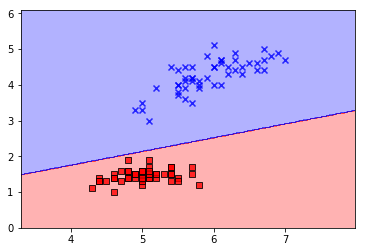

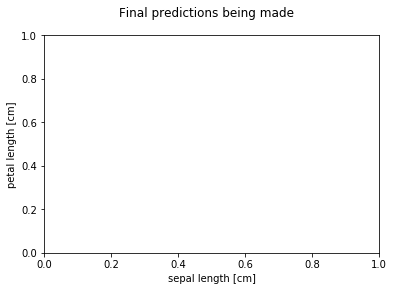

In [19]:
# Making the predictions, preparing the data and plotting it.
create_linear_decision_boundary_plot(x, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [ ]:
0